#### Datathon 2022 - EPI Gijón

In [115]:
## Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
## Parsing CSV data

df_amazon = pd.read_csv('data/Amazon.csv')
df_Email = pd.read_csv('data/Email.csv')
df_Facebook = pd.read_csv('data/Facebook.csv')
df_Google = pd.read_csv('data/Google.csv')
df_Instagram = pd.read_csv('data/Instagram.csv')
df_Radio = pd.read_csv('data/Radio.csv')
df_TV = pd.read_csv('data/TV.csv')
df_Youtube = pd.read_csv('data/Youtube.csv')
df_Tiktok = pd.read_csv('data/TikTok.csv')
df_Ventas = pd.read_csv('data/Ventas.CSV')



In [117]:
# Sumar quincenas de Faceboook

df_Facebook['Facebook'] = df_Facebook['Facebook 1 quincena'] + df_Facebook['Facebook 2 quincena']

df_Facebook.drop(columns='Facebook 1 quincena', inplace=True)
df_Facebook.drop(columns='Facebook 2 quincena', inplace=True)
df_Facebook.head(10)

,Date,Facebook
0,01-03-20,0.00
1,01-04-20,73571.23
2,01-05-20,0.00
3,01-06-20,0.00
4,01-07-20,0.00
5,01-08-20,0.00
6,01-09-20,0.00
7,01-10-20,0.00
8,01-11-20,0.00
9,01-12-20,0.00


In [118]:
## Join the data in a single dataframe

df = df_Email.merge(df_amazon)
df = df.merge(df_Facebook)
df = df.merge(df_Google)
df = df.merge(df_Instagram)
df = df.merge(df_Radio)
df = df.merge(df_TV)
df = df.merge(df_Youtube)
df = df.merge(df_Tiktok)
df = df.merge(df_Ventas)


In [119]:
# df.drop(columns='Email', inplace=True)
# df.drop(columns='Facebook', inplace=True)
# df.drop(columns='Radio', inplace=True)

In [120]:
df.drop(columns='Date', inplace=True)
df.head(1)

,Email,Amazon,Facebook,Google,Instagram,Radio,TV,Youtube,Tik_Tok,Ventas_Videojuegos
0,9816.14,3408.66,0.0,87651.96,51433.0,54323.04,192879.88,26351.22,0.0,54674.0


<AxesSubplot:title={'center':'Ventas cada mes'}>

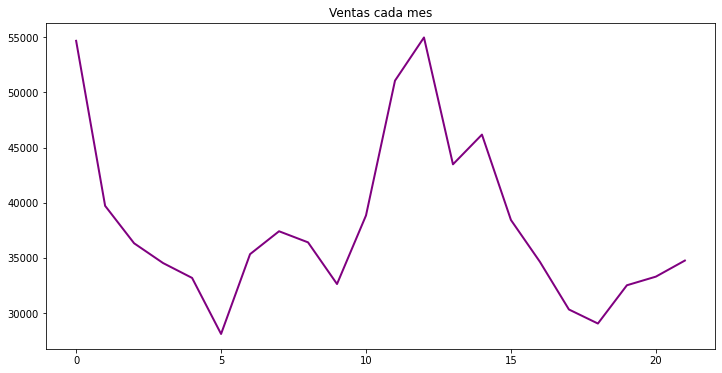

In [121]:
## Visualize data
# from pandas.plotting import scatter_matrix
# cols = ['Email', 'Amazon', 'Facebook', 'Google',
#         'Instagram', 'Radio', 'TV', 'Youtube', 'Tik_Tok']

# ax = scatter_matrix(df[cols],
#                     diagonal='kde',
#                     figsize=(12, 12))
# df['sum'] = df[cols].sum(axis=1)

df['Ventas_Videojuegos'].plot(kind='line', color='purple', linewidth=2, title='Ventas cada mes', figsize=(12, 6))

In [122]:
# df.plot(kind='scatter', x='sum', y='Ventas_Videojuegos')

In [123]:
df.shape

(23, 10)

In [124]:
df.isna().mean()

Email                 0.000000
Amazon                0.000000
Facebook              0.000000
Google                0.000000
Instagram             0.000000
Radio                 0.000000
TV                    0.000000
Youtube               0.000000
Tik_Tok               0.000000
Ventas_Videojuegos    0.043478
dtype: float64

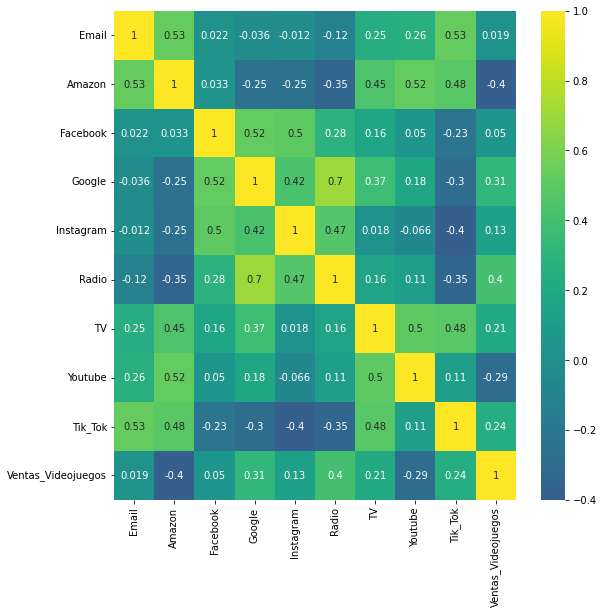

In [125]:
plt.figure(figsize=(9, 9))
ax = sns.heatmap(df.corr(), center=0, cmap="viridis", annot=True)


In [126]:
## Extract the prediction data from df

df_prediction_X = df.iloc[-1,1:-1]
df_prediction_X

Amazon        39008.14
Facebook          0.00
Google        38854.81
Instagram     27654.25
Radio             0.00
TV           244198.43
Youtube       24184.21
Tik_Tok        9528.75
Name: 22, dtype: float64

In [127]:
## UP-SAMPLE

from sklearn.utils import resample

df_minority = df.drop([df.index[-1]])
df_upsampled = resample(df_minority, replace=True, n_samples=100, random_state=123)

In [128]:
## Separate Input from Output

X = df.iloc[:-1,1:-1]
y = df.iloc[:-1,-1] 

#X = df_upsampled.iloc[:-1,1:-1]
#y = df_upsampled.iloc[:-1,-1]

In [129]:
## Standardization

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [130]:
## Train and test splits

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=123)

X_test.shape

(1, 8)

In [131]:
# # First model

# from sklearn.linear_model import LogisticRegression

# # Create the model
# clf = LogisticRegression(random_state=123, max_iter=1000)

# # Train the model
# clf.fit(X_test, y_test)


# ## Evaluate the model
# # Get predictions
# y_pred = clf.predict(X_test)

In [132]:
# Second model

# from sklearn.svm import LinearSVC

# # Create the model
# clf = LinearSVC(random_state=123, max_iter=1000)

# # Train the model
# clf.fit(X_train, y_train)


# ## Evaluate the model
# # Get predictions
# y_pred = clf.predict(X_test)

In [141]:
##Third model

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Create the model
clf = Lasso(random_state=123, max_iter=1000, alpha=.01)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
# Get predictions
y_pred = clf.predict(X_test)

1.0


In [134]:
# # Fourth model

# from sklearn.linear_model import Ridge

# # Create the model
# clf = Ridge(alpha=.5)

# # Train the model
# clf.fit(X_test, y_test)


# ## Evaluate the model
# # Get predictions
# y_pred = clf.predict(X_test)

In [135]:
print(f'Predicted value: {y_pred}')
print(f'Real value: {y_test}')


Predicted value: [36527.45075032]
Real value: 4    33185.0
Name: Ventas_Videojuegos, dtype: float64


In [136]:
X_to_predict = df_prediction_X.to_numpy()
X_to_predict = X_to_predict.reshape((1, len(X_to_predict)))

In [137]:
X_to_predict = StandardScaler().fit_transform(X_to_predict)

In [138]:
y_predicted = clf.predict(X_to_predict)
print(f'Our prediction: {y_predicted[0]}')

Our prediction: 38147.20230683259
